# 4. Quality Metrics


The quality metrics we suggest:

1. Detecting moving and stationary objects
2. Detecting objects with changing types (it is described in the previous section)
3. Detecting statistical outliers for the main characteristics
4. Creating thresholds for certain parameters

Based on these criteria, we can assess the percentage of unreliable data for each 5-minute interval (the interval could be changed).


Import Libraries


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

Reading Data


In [8]:
lines_gdf_stat = gpd.read_file('data/2_lines_gdf_stat.gpkg')

lines_gdf_cars = lines_gdf_stat[lines_gdf_stat['object_type'] =='CAR']
lines_gdf_pedestrians = lines_gdf_stat[lines_gdf_stat['object_type'] =='PEDESTRIAN']
lines_gdf_two_wheelers = lines_gdf_stat[lines_gdf_stat['object_type'] =='CYCLIST']

## 1. Moving and Stationary Objects


Based on the calculations of distance between first and last point we can detect objects that didnt move


### Cars


#### Detect Stationary objects


In [31]:
lines_gdf_cars['stationary'] = (lines_gdf_cars['distance_first_last'] < 15).astype(int)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### Show the amount of stationary objects for each 5-minutes interval


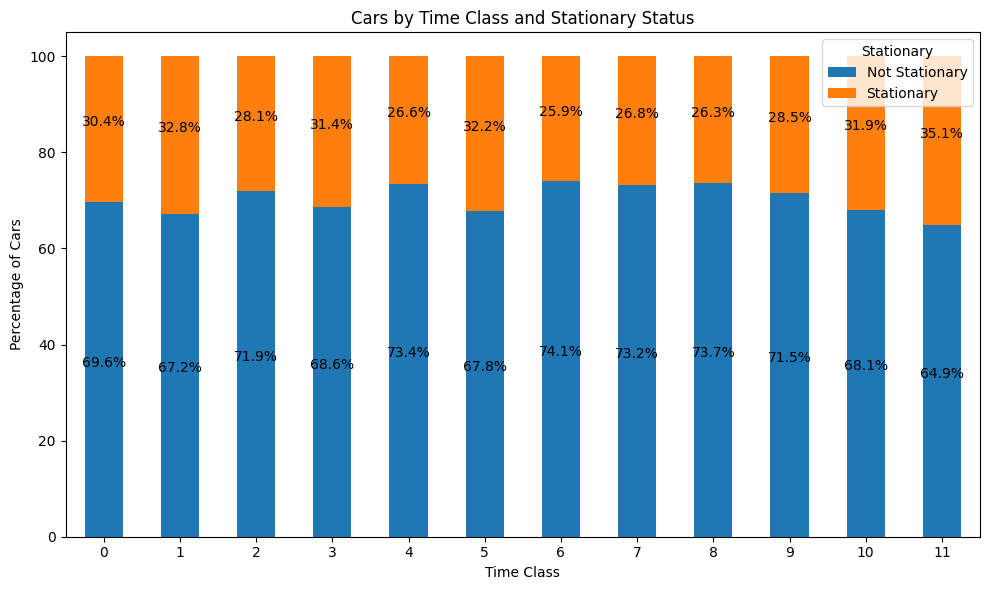

In [32]:
# Group by 'time_class' and 'stationary', count occurrences
grouped = lines_gdf_cars.groupby(['time_class', 'stationary']).size().unstack(fill_value=0)

# Calculate percentages for each 'time_class'
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding percentages to the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Cars by Time Class and Stationary Status')
plt.xlabel('Time Class')
plt.ylabel('Percentage of Cars')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Stationary', labels=['Not Stationary', 'Stationary'])

# Show the plot
plt.tight_layout()
plt.show()

Around 30% of all cars didnt move. It could be some cars standing at parking solts or random data errors


### Pedestrians


#### Detect Stationary objects


In [29]:
lines_gdf_pedestrians['stationary'] = (lines_gdf_pedestrians['distance_first_last'] < 8).astype(int)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### Show the amount of stationary objects for each 5-minutes interval


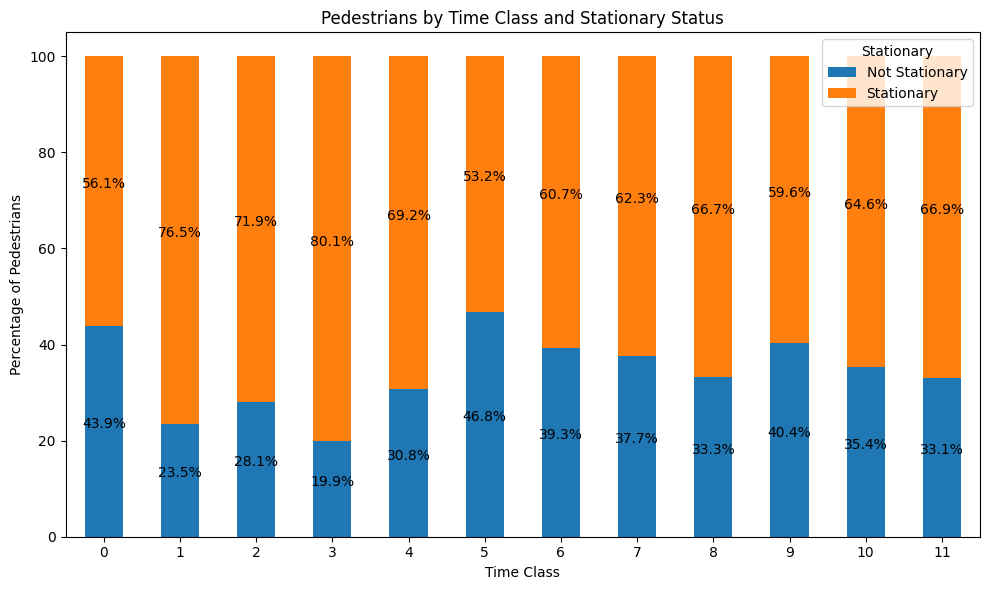

In [30]:
# Group by 'time_class' and 'stationary', count occurrences
grouped = lines_gdf_pedestrians.groupby(['time_class', 'stationary']).size().unstack(fill_value=0)

# Calculate percentages for each 'time_class'
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding percentages to the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Pedestrians by Time Class and Stationary Status')
plt.xlabel('Time Class')
plt.ylabel('Percentage of Pedestrians')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Stationary', labels=['Not Stationary', 'Stationary'])

# Show the plot
plt.tight_layout()
plt.show()

This approach indicates that only 30-40% of pedestrians were observed moving. However, it's important to note that we cannot conclusively determine that the remainder were stationary. This highlights a limitation of using this method for pedestrians, as some individuals may have returned to their starting point during the observation period.

In this scenario, additional analysis is necessary, considering other characteristics and examining the complete route paths taken by pedestrians.


### Two-Wheelers


#### Detect Stationary objects


In [33]:
lines_gdf_two_wheelers['stationary'] = (lines_gdf_two_wheelers['distance_first_last'] < 15).astype(int)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### Show the amount of stationary objects for each 5-minutes interval


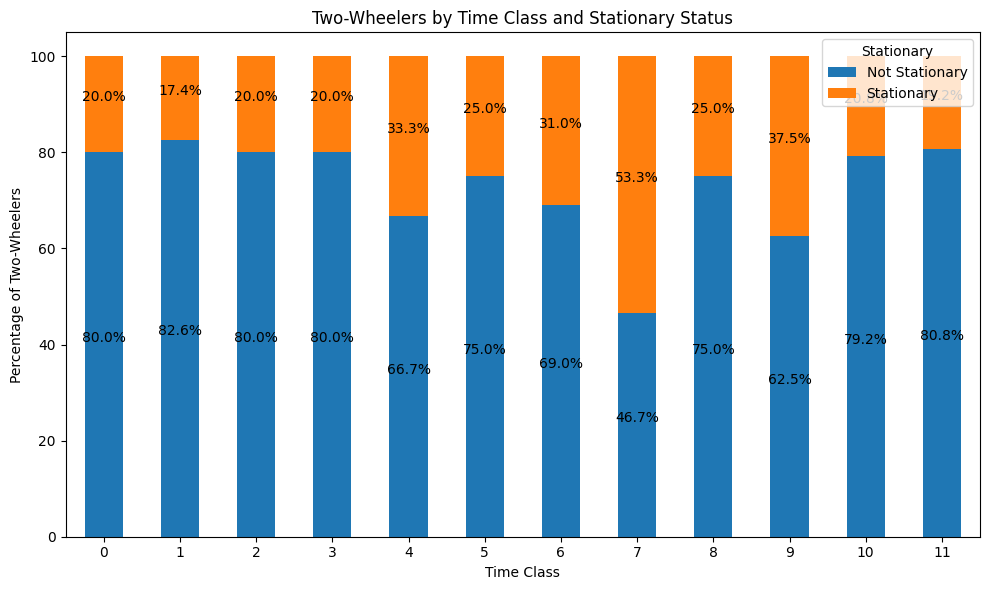

In [28]:
# Group by 'time_class' and 'stationary', count occurrences
grouped = lines_gdf_two_wheelers.groupby(['time_class', 'stationary']).size().unstack(fill_value=0)

# Calculate percentages for each 'time_class'
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding percentages to the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Two-Wheelers by Time Class and Stationary Status')
plt.xlabel('Time Class')
plt.ylabel('Percentage of Two-Wheelers')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Stationary', labels=['Not Stationary', 'Stationary'])

# Show the plot
plt.tight_layout()
plt.show()

Two-wheelers show similar statistics to cars, except between 15:35 and 15:40, where more than half of the objects are considered stationary. Further examination is needed.


## 3. Statistical Outliers


Creating function to easlily detect statistical outliers based on the 1,5 Interquartile Range.


In [9]:
def detect_outliers(df, columns):
    # Create a copy of the DataFrame to avoid modifying the original
    df_outliers = df.copy()
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df_outliers[col].quantile(0.25)
        Q3 = df_outliers[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a new field indicating outliers
        outlier_field = f"{col}_outlier"
        df_outliers[outlier_field] = ((df_outliers[col] < lower_bound) | (df_outliers[col] > upper_bound)).astype(int)
        
    # Calculate the sum of outliers for each row
    outlier_columns = [f"{col}_outlier" for col in columns]
    df_outliers['total_outliers'] = df_outliers[outlier_columns].sum(axis=1)
    
    return df_outliers


### Cars


#### Detecting Outliers


In [10]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
cars_outliers = detect_outliers(lines_gdf_cars, columns_to_check)
cars_outliers.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,direct_real_d_ratio,geometry,total_time_outlier,avg_v_outlier,avg_width_outlier,avg_height_outlier,avg_length_outlier,route_length_outlier,distance_first_last_outlier,total_outliers
0,152997118,286302,133.7800,0.03,1.869,4.387,1.151,CAR,0,0.065886,...,623.585910,"LINESTRING (13.06440 47.81014, 13.06441 47.810...",1,0,0,0,0,0,0,1
2,152997182,270701,139.9335,0.02,1.912,4.523,1.690,CAR,0,-0.068684,...,698.199732,"LINESTRING (13.06413 47.81005, 13.06413 47.810...",1,0,0,0,0,0,0,1
3,152997183,101799,105.4660,0.01,1.872,4.867,1.566,CAR,0,-0.081633,...,1.208331,"LINESTRING (13.06339 47.80977, 13.06339 47.809...",0,0,0,0,0,0,0,0
4,152997184,100897,97.4585,0.01,1.974,5.000,1.615,CAR,0,-0.053851,...,1.299410,"LINESTRING (13.06339 47.80978, 13.06340 47.809...",0,0,0,0,0,0,0,0
7,152997753,109398,34.2955,0.04,2.227,5.777,2.422,CAR,0,0.225113,...,2.013326,"LINESTRING (13.06394 47.80935, 13.06394 47.809...",0,0,1,0,1,0,0,2


#### Showing amount of outliers fo 5-minutes intervals


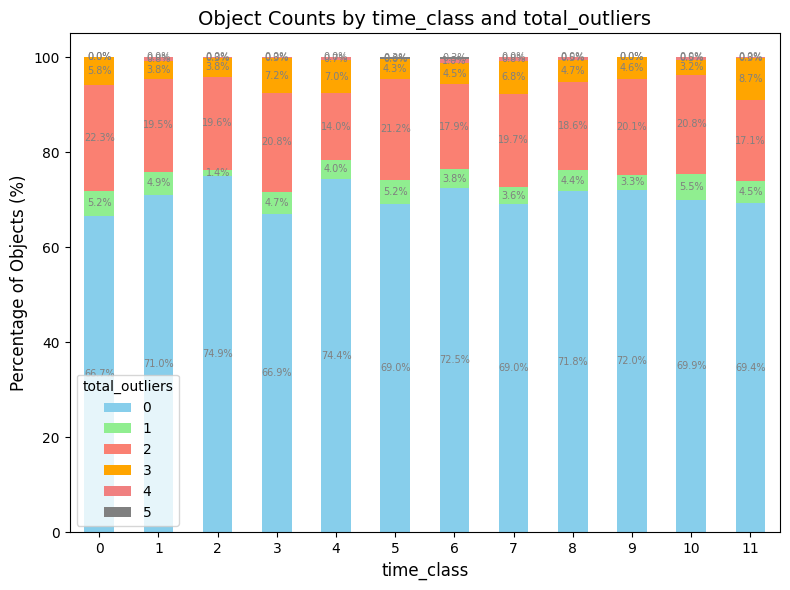

In [11]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = cars_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'gray']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Pedestrians


#### Detecting Outliers


In [12]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
pedestrians_outliers = detect_outliers(lines_gdf_pedestrians, columns_to_check)
pedestrians_outliers.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,direct_real_d_ratio,geometry,total_time_outlier,avg_v_outlier,avg_width_outlier,avg_height_outlier,avg_length_outlier,route_length_outlier,distance_first_last_outlier,total_outliers
1,152997181,138700,148.052,0.770,0.559,0.5585,1.3320,PEDESTRIAN,0,-0.048435,...,1.684016,"LINESTRING (13.06399 47.81006, 13.06399 47.810...",1,0,0,0,0,1,1,3
5,152997343,108398,228.052,0.100,0.659,0.6375,1.0935,PEDESTRIAN,0,-0.075645,...,2.245971,"LINESTRING (13.06429 47.80957, 13.06429 47.809...",1,0,0,0,0,0,0,1
6,152997466,115007,233.052,0.070,0.459,0.5000,1.4510,PEDESTRIAN,0,-0.175439,...,1.953137,"LINESTRING (13.06442 47.80944, 13.06441 47.809...",1,0,0,0,0,1,1,3
8,152997836,109009,134.466,0.020,0.574,0.6820,1.2320,PEDESTRIAN,0,-0.089454,...,1.146090,"LINESTRING (13.06453 47.80964, 13.06453 47.809...",1,0,0,0,0,1,1,3
9,152997959,116001,223.052,0.585,0.448,0.3850,1.1940,PEDESTRIAN,0,0.288462,...,3.144418,"LINESTRING (13.06450 47.80986, 13.06451 47.809...",1,0,0,0,0,1,0,2


#### Showing amount of outliers fo 5-minutes intervals


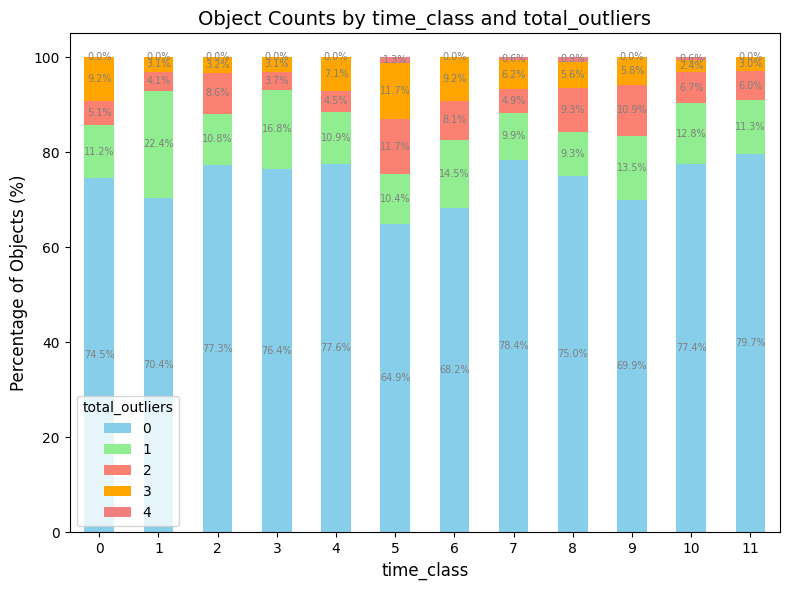

In [13]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = pedestrians_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Two-Wheelers


#### Detecting Outliers


In [14]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
two_wheelers_outliers = detect_outliers(lines_gdf_two_wheelers, columns_to_check)


#### Showing amount of outliers fo 5-minutes intervals


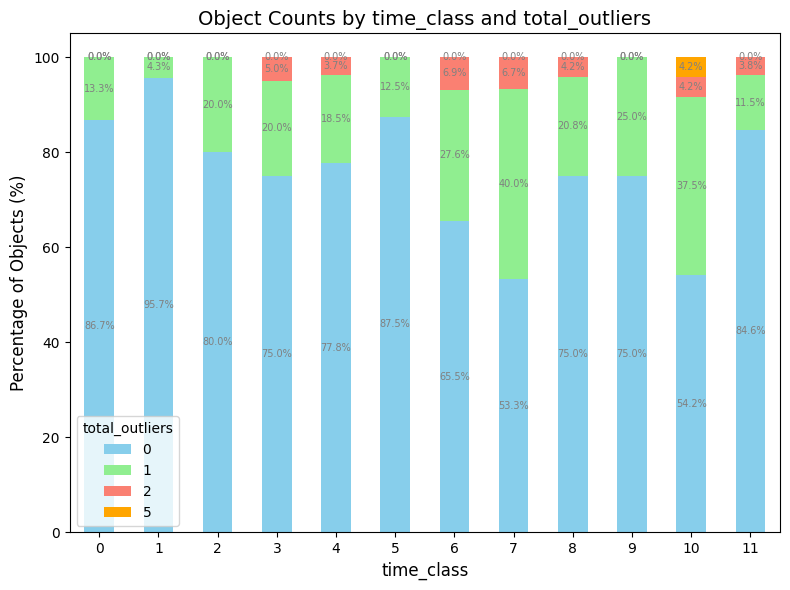

In [15]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = two_wheelers_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Creating thresholds for certain parameters


This approach can add more value, as statistical outliers sometimes do not work well with small values in our data.

Unfortunately, in this project, we lack time to conduct this approach, but we emphasize that relying solely on statistical outliers is insufficient. Additional analysis and manual detection of thresholds are needed.
